In [1]:
import pandas as pd
import ollama 

In [2]:
df = pd.read_csv('feedback.csv', encoding='ISO-8859-1')
df.head(2)

,Country,Case Number,Contact Name,Contact: Email,Mobile,Subject,Date/Time Opened,Age (Days),Case Age Range,Description,Case Category,Case Sub-Category,Date/Time Closed,Case Owner,Status,Case Channel
0,Singapore,251757,NaN,NaN,NaN,PropertyGuru.com.sg - FEEDBACK : USER - FEEDBACK,23/1/2024 11:21,0,Less than 30 Days,FTYPE: USER - FEEDBACK\nUSERID: \nEMAIL: garyn...,Feedback/Enhancement,Platform,23/1/2024 11:36,Anis Syazwani Zulhapili,Closed,Email
1,Singapore,252085,NaN,NaN,NaN,PropertyGuru.com.sg - FEEDBACK : USER - FEEDBACK,24/1/2024 22:19,0,Less than 30 Days,FTYPE: USER - FEEDBACK\nUSERID: \nEMAIL: acein...,Feedback/Enhancement,Platform,25/1/2024 9:07,Anis Syazwani Zulhapili,Closed,Email


In [4]:
def get_sentiment(feedback):
    response = ollama.chat(model='llama3:8b-instruct-q8_0', messages=[
    {
        'role': 'user',
        'content': f'You are an expert customer success manager. Understand the text and give the sentiment as Positive, Negative, Neutral. ONLY return the sentiment and nothing else.\n Text: {feedback}',
    },
    ])
    setiment = response['message']['content']
    print(setiment)
    return setiment.strip()

In [5]:
df['Sentiment'] = df['Description'].apply(get_sentiment)

Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Neutral
Neutral
Positive
Positive
Negative
Neutral
Positive
Neutral
Negative
Negative
Positive
Negative
Negative
Neutral
Neutral
Negative
Neutral
Positive
Positive
Negative
Negative
Positive
Negative
Negative
Negative
Positive
Negative
Positive
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Positive
Negative
Ne

In [6]:
def get_tags(feedback):
    response = ollama.chat(model='llama3:8b-instruct-q8_0', messages=[
    {
        'role': 'user',
        'content': f'You are an expert customer success manager. Understand the text and give 1 word tags(upto 5 tags) seperated by commas. ONLY return the tags and nothing else.\n Text: {feedback}',
    },
    ])
    tags = response['message']['content']
    return tags.strip()
df['tags'] = df['Description'].apply(get_tags)

In [ ]:
df.head(3)

In [35]:
df.to_csv('feedback_processed.csv', index=False)

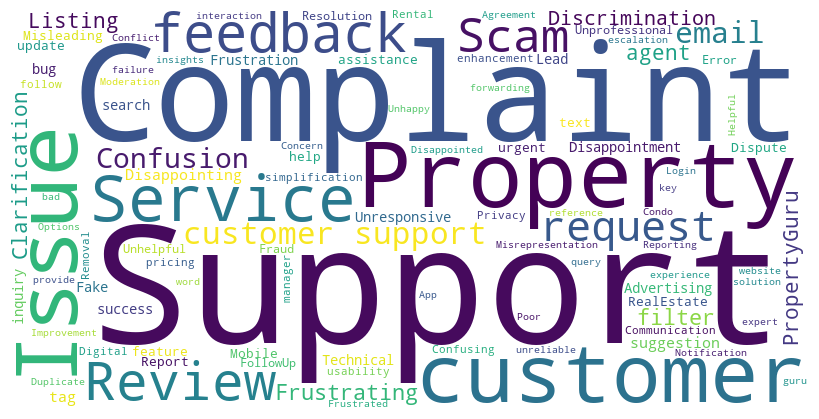

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df.tags)
text = text.replace('Tags', '')
text = text.replace('Feedback', '')
text = text.replace('Agent', '')
text = text.replace('Customer', '')
wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color ='white',
    colormap='viridis',  # Color theme
    max_words=200,
    min_font_size = 10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
